# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [6]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [9]:
diabetes['data'].shape[1] # El significado lo vemos en data['DESCR']

10

In [ ]:
# En data están las variables predictoras o independientes, que me sirven para predecir la variable target, que es la variable dependiente

In [10]:
diabetes['data'].shape[0]

442

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [13]:
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df['target'] = diabetes['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [19]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [20]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [ ]:
X = diabetes["data"]
y = diabetes['target']

In [26]:
20/len(diabetes['data'])

0.04524886877828054

In [21]:
from sklearn.model_selection import train_test_split

diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(
                                                                                                        diabetes["data"],
                                                                                                        diabetes['target'],
                                                                                                        test_size = 20,
                                                                                                        shuffle = False)

In [24]:
diabetes_data_test

array([[-0.07816532,  0.05068012,  0.07786339,  0.05285804,  0.07823631,
         0.0644473 ,  0.02655027, -0.00259226,  0.04067283, -0.00936191],
       [ 0.0090156 ,  0.05068012, -0.03961813,  0.02875809,  0.03833367,
         0.0735286 , -0.07285395,  0.1081111 ,  0.01556846, -0.04664087],
       [ 0.00175052,  0.05068012,  0.01103904, -0.01944183, -0.01670444,
        -0.00381907, -0.04708248,  0.03430886,  0.02405509,  0.02377494],
       [-0.07816532, -0.04464164, -0.04069594, -0.08141314, -0.10063757,
        -0.11279473,  0.02286863, -0.0763945 , -0.02029232, -0.05078298],
       [ 0.03081083,  0.05068012, -0.03422907,  0.04366563,  0.05759701,
         0.06883138, -0.03235593,  0.05755657,  0.0354587 ,  0.08590655],
       [-0.03457486,  0.05068012,  0.00564998, -0.00567042, -0.07311851,
        -0.06269098, -0.00658447, -0.03949338, -0.04542404,  0.03205916],
       [ 0.04897352,  0.05068012,  0.08864151,  0.08728655,  0.03558177,
         0.02154596, -0.02499266,  0.03430886

In [23]:
diabetes['data'][-20:,] #test

array([[-0.07816532,  0.05068012,  0.07786339,  0.05285804,  0.07823631,
         0.0644473 ,  0.02655027, -0.00259226,  0.04067283, -0.00936191],
       [ 0.0090156 ,  0.05068012, -0.03961813,  0.02875809,  0.03833367,
         0.0735286 , -0.07285395,  0.1081111 ,  0.01556846, -0.04664087],
       [ 0.00175052,  0.05068012,  0.01103904, -0.01944183, -0.01670444,
        -0.00381907, -0.04708248,  0.03430886,  0.02405509,  0.02377494],
       [-0.07816532, -0.04464164, -0.04069594, -0.08141314, -0.10063757,
        -0.11279473,  0.02286863, -0.0763945 , -0.02029232, -0.05078298],
       [ 0.03081083,  0.05068012, -0.03422907,  0.04366563,  0.05759701,
         0.06883138, -0.03235593,  0.05755657,  0.0354587 ,  0.08590655],
       [-0.03457486,  0.05068012,  0.00564998, -0.00567042, -0.07311851,
        -0.06269098, -0.00658447, -0.03949338, -0.04542404,  0.03205916],
       [ 0.04897352,  0.05068012,  0.08864151,  0.08728655,  0.03558177,
         0.02154596, -0.02499266,  0.03430886

In [27]:
diabetes['data'][:-20,] #train

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [-0.02004471, -0.04464164, -0.0547075 , ..., -0.03949338,
        -0.07409261, -0.0052198 ],
       [ 0.02354575, -0.04464164, -0.03638469, ...,  0.03430886,
        -0.03324559,  0.06105391],
       [ 0.03807591,  0.05068012,  0.0164281 , ...,  0.07120998,
         0.0497702 ,  0.01549073]])

Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [29]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


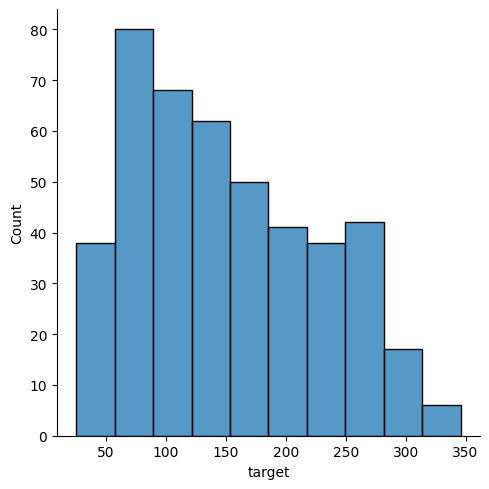

In [30]:
import seaborn as sns

sns.displot(df['target'])

<Axes: >

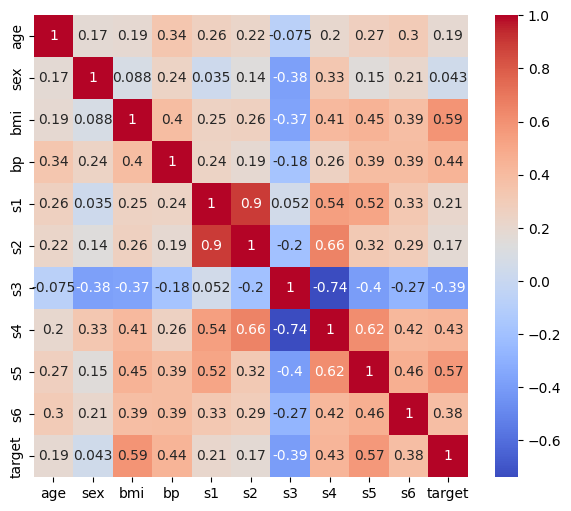

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), annot=True, cmap= "coolwarm")

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [39]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [40]:
print(diabetes_model.intercept_)
print(diabetes_model.coef_)

152.76429169049118
[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


y = a + b*x1 + c*x2 + d*x3 + ....

In [41]:
predictions = diabetes_model.predict(diabetes_data_test)
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

#### Print your `diabetes_target_test` and compare with the prediction. 

In [44]:
df_eval = pd.DataFrame({"pred":predictions, "real_value":diabetes_target_test})
df_eval['error'] = df_eval['real_value'] - df_eval['pred']
df_eval

,pred,real_value,error
0,197.618985,233.0,35.381015
1,155.440320,91.0,-64.440320
2,172.888751,111.0,-61.888751
3,111.532706,152.0,40.467294
4,164.793973,120.0,-44.793973
5,131.067659,67.0,-64.067659
6,259.124412,310.0,50.875588
7,100.478737,94.0,-6.478737
8,117.060054,183.0,65.939946
9,124.302616,66.0,-58.302616


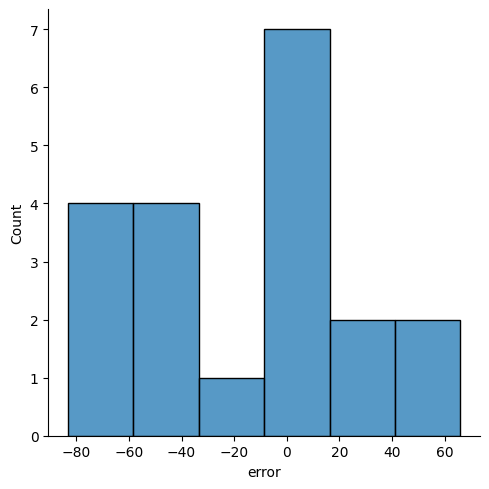

In [45]:
sns.displot(df_eval['error'])

#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

print("R2", round(r2_score(diabetes_target_test, predictions),3))
print("MAE", round(mean_absolute_error(diabetes_target_test, predictions),3))
print("MAPE", round(mean_absolute_percentage_error(diabetes_target_test, predictions),3))
print("MSE", round(mean_squared_error(diabetes_target_test, predictions),3))
print("RMSE", round(np.sqrt(mean_squared_error(diabetes_target_test, predictions)),3))

R2 0.585
MAE 36.61
MAPE 0.393
MSE 2004.519
RMSE 44.772


#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.

In [54]:
X = df.drop(columns=['sex','s2','s4','target'])
y = df['target']

In [55]:
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(
                                                                                                        X,
                                                                                                        y,
                                                                                                        test_size = 20,
                                                                                                        shuffle = False)

In [56]:
diabetes_model_2 = LinearRegression()
diabetes_model_2.fit(diabetes_data_train, diabetes_target_train)
predictions_2 = diabetes_model_2.predict(diabetes_data_test)

print("R2", round(r2_score(diabetes_target_test, predictions_2),3))
print("MAE", round(mean_absolute_error(diabetes_target_test, predictions_2),3))
print("MAPE", round(mean_absolute_percentage_error(diabetes_target_test, predictions_2),3))
print("MSE", round(mean_squared_error(diabetes_target_test, predictions_2),3))
print("RMSE", round(np.sqrt(mean_squared_error(diabetes_target_test, predictions_2)),3))

R2 0.564
MAE 37.249
MAPE 0.403
MSE 2106.881
RMSE 45.901


In [60]:
X = df[['bmi','s5']]
y = df['target']

In [61]:
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(
                                                                                                        X,
                                                                                                        y,
                                                                                                        test_size = 20,
                                                                                                        shuffle = False)

In [62]:
diabetes_model_3 = LinearRegression()
diabetes_model_3.fit(diabetes_data_train, diabetes_target_train)
predictions_3 = diabetes_model_3.predict(diabetes_data_test)

print("R2", round(r2_score(diabetes_target_test, predictions_3),3))
print("MAE", round(mean_absolute_error(diabetes_target_test, predictions_3),3))
print("MAPE", round(mean_absolute_percentage_error(diabetes_target_test, predictions_3),3))
print("MSE", round(mean_squared_error(diabetes_target_test, predictions_3),3))
print("RMSE", round(np.sqrt(mean_squared_error(diabetes_target_test, predictions_3)),3))

R2 0.589
MAE 38.503
MAPE 0.432
MSE 1984.486
RMSE 44.548


In [64]:
X = df.drop(columns=['s1','s4','target'])
y = df['target']
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(
                                                                                                        X,
                                                                                                        y,
                                                                                                        test_size = 20,
                                                                                                        shuffle = False)
diabetes_model_4 = LinearRegression()
diabetes_model_4.fit(diabetes_data_train, diabetes_target_train)
predictions_4 = diabetes_model_4.predict(diabetes_data_test)

print("R2", round(r2_score(diabetes_target_test, predictions_4),3))
print("MAE", round(mean_absolute_error(diabetes_target_test, predictions_4),3))
print("MAPE", round(mean_absolute_percentage_error(diabetes_target_test, predictions_4),3))
print("MSE", round(mean_squared_error(diabetes_target_test, predictions_4),3))
print("RMSE", round(np.sqrt(mean_squared_error(diabetes_target_test, predictions_4)),3))

R2 0.588
MAE 36.909
MAPE 0.404
MSE 1988.194
RMSE 44.589


In [ ]:
from sklearn.preprocessing import StandardScaler

In [67]:
X = df.drop(columns=['s1','s4','target'])
y = df['target']
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(
                                                                                                        X,
                                                                                                        y,
                                                                                                        test_size = 20,
                                                                                                        shuffle = False)
scaler = StandardScaler()
scaler.fit(diabetes_data_train)
scaler_data_train_scal = scaler.transform(diabetes_data_train)
scaler_data_test_scal = scaler.transform(diabetes_data_test)

diabetes_model_5 = LinearRegression()
diabetes_model_5.fit(scaler_data_train_scal, diabetes_target_train)
predictions_5 = diabetes_model_5.predict(scaler_data_test_scal)

print("R2", round(r2_score(diabetes_target_test, predictions_5),3))
print("MAE", round(mean_absolute_error(diabetes_target_test, predictions_5),3))
print("MAPE", round(mean_absolute_percentage_error(diabetes_target_test, predictions_5),3))
print("MSE", round(mean_squared_error(diabetes_target_test, predictions_5),3))
print("RMSE", round(np.sqrt(mean_squared_error(diabetes_target_test, predictions_5)),3))

R2 0.588
MAE 36.909
MAPE 0.404
MSE 1988.194
RMSE 44.589
